In [1]:
#Run the following code to print multiple outputs from a cell
get_ipython().ast_node_interactivity = 'all'

# Inferential Modeling

## Importing & Profiling the Data
For this worksheet, we'll be using a file called, "Cars.csv", that contains the following fields:

* mpg: Miles/(US) gallon
* disp: Displacement (cu. in.)
* weight: Weight (lbs.)
* trans: Transmission (“auto”, “manual”)
* likes: # of reviews that “like” this car model

Let's import the file, "Cars.csv", and save it in a variable called `df`. Then, do some initial data profiling of the data. 

In [2]:
import pandas as pd
df = pd.read_csv("Cars.csv")
df
df.dtypes

,weight,trans,disp,mpg,likes
0,2629.352834,manual,262.738088,35.142443,550
1,3180.711564,auto,314.899095,26.440939,24
2,2800.649880,auto,278.271319,28.460785,50
3,2654.002500,auto,270.853970,33.874817,155
4,3248.800906,auto,328.693431,26.524794,21
...,...,...,...,...,...
4265,3485.852699,auto,350.012993,30.988562,44
4266,3341.001170,auto,337.141002,23.895364,12
4267,3000.993054,manual,299.007420,33.775384,352
4268,3223.297904,auto,323.836850,27.140179,25


weight    float64
trans      object
disp      float64
mpg       float64
likes       int64
dtype: object

Let's see if there are missing values and get summary stats for the quantitative variables:

In [3]:
df.isna().sum()
df.describe()

weight    0
trans     0
disp      0
mpg       0
likes     0
dtype: int64

,weight,disp,mpg,likes
count,4270.000000,4270.000000,4270.000000,4270.000000
mean,3202.023859,320.254541,28.679822,101.007728
std,296.018265,29.756977,3.679044,157.250581
min,2106.305381,209.979924,16.786339,2.000000
25%,3001.705217,300.062690,26.173175,20.000000
50%,3199.209097,319.956257,28.621411,41.000000
75%,3400.664862,340.280518,31.148787,110.000000
max,4303.790176,429.253745,43.125611,2622.000000


Let's see the breakdown of "auto" vs. "manual" for the `trans` variable:

auto      3190
manual    1080
Name: trans, dtype: int64

auto      0.747073
manual    0.252927
Name: trans, dtype: float64

<Axes: >

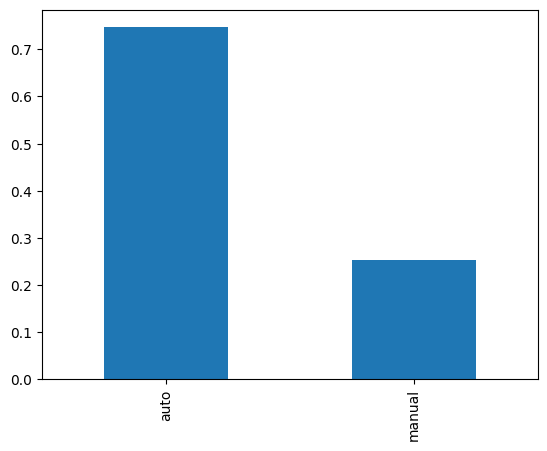

In [4]:
df["trans"].value_counts()
df["trans"].value_counts(normalize = True)
df["trans"].value_counts(normalize = True).plot.bar()

And now look at histograms for the quantitative variables to understand their distributions:

<Axes: ylabel='Frequency'>

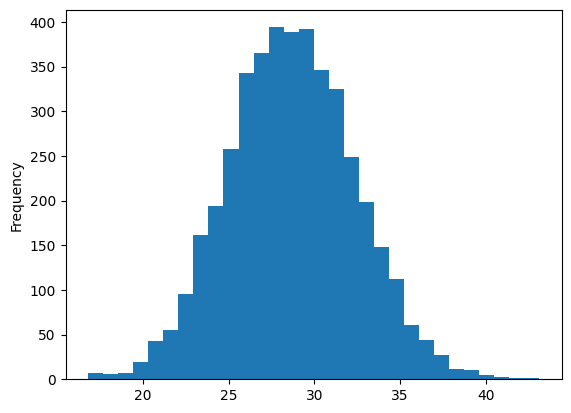

In [5]:
df["mpg"].plot.hist(bins = 30)

<Axes: ylabel='Frequency'>

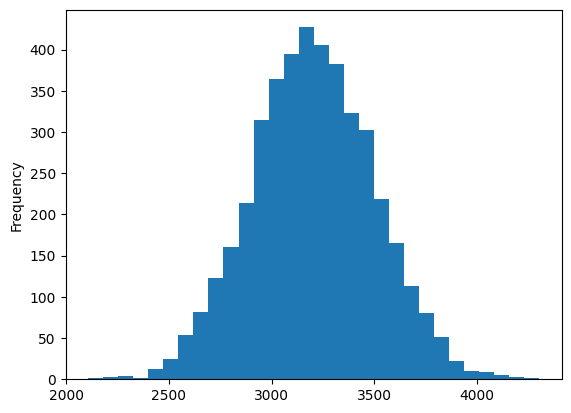

In [6]:
df["weight"].plot.hist(bins = 30)

<Axes: ylabel='Frequency'>

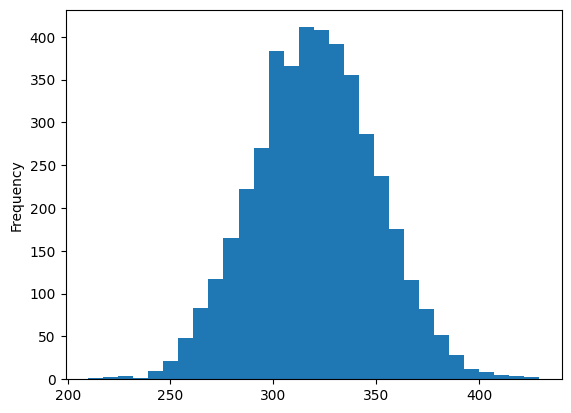

In [7]:
df["disp"].plot.hist(bins = 30)

<Axes: ylabel='Frequency'>

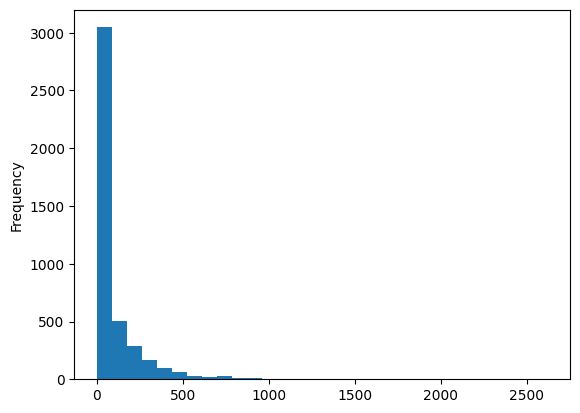

In [8]:
df["likes"].plot.hist(bins = 30)

## Looking for relationships

When building linear models, it's a good idea to first look at scatterplots to see if the relationship is linear. A quick way to do this is with the `scatter_matrix` function:

array([[<Axes: xlabel='weight', ylabel='weight'>,
        <Axes: xlabel='disp', ylabel='weight'>,
        <Axes: xlabel='mpg', ylabel='weight'>,
        <Axes: xlabel='likes', ylabel='weight'>],
       [<Axes: xlabel='weight', ylabel='disp'>,
        <Axes: xlabel='disp', ylabel='disp'>,
        <Axes: xlabel='mpg', ylabel='disp'>,
        <Axes: xlabel='likes', ylabel='disp'>],
       [<Axes: xlabel='weight', ylabel='mpg'>,
        <Axes: xlabel='disp', ylabel='mpg'>,
        <Axes: xlabel='mpg', ylabel='mpg'>,
        <Axes: xlabel='likes', ylabel='mpg'>],
       [<Axes: xlabel='weight', ylabel='likes'>,
        <Axes: xlabel='disp', ylabel='likes'>,
        <Axes: xlabel='mpg', ylabel='likes'>,
        <Axes: xlabel='likes', ylabel='likes'>]], dtype=object)

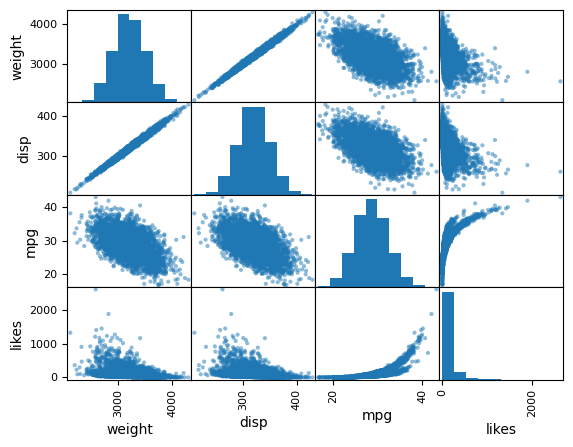

In [9]:
pd.plotting.scatter_matrix(df)

The `scatter_matrix` function graphs all pair-wise comparisons between the quantitative variables. But what about categorical variables?

Side-by-side boxplots are a good way to see if there are differences. We'll be trying to predict `mpg`, so let's see the distribution of that variable for both "auto" and "manual" `trans` categories:

<Axes: title={'center': 'mpg'}, xlabel='trans'>

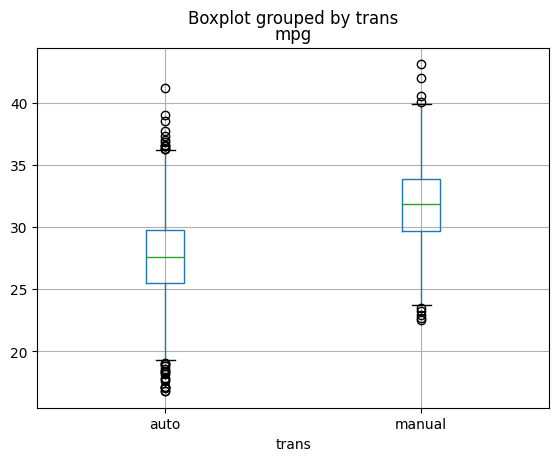

In [10]:
df.boxplot(column = "mpg", by = "trans")

## Linear Regression Refresher

Linear regression models find the "line of best fit" to describe the data points:
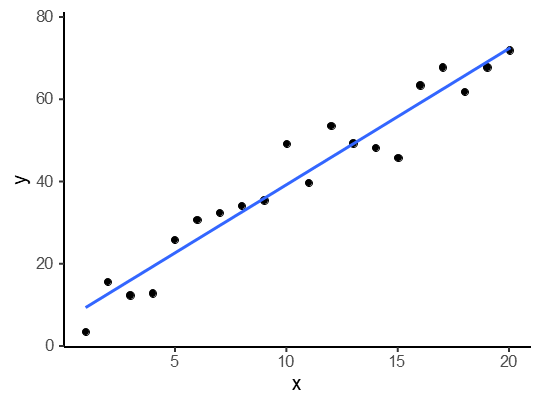

Key is to minimize the "error" - get the line as close to the actual data points as you can.

Running a linear regression in python takes the following syntax:

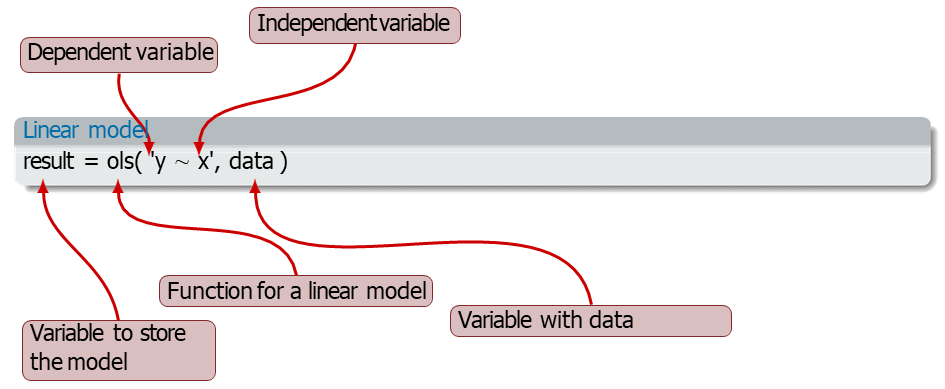

## Building a Model

The econometric models we'll be using are in the `statsmodels` module (specifically the `statsmodels.formula.api` submodule):

In [11]:
import statsmodels.formula.api as smf 
# notice the smf alias, this will save us from a lot of typing

You can see a list of the different models in this module at the following link: https://www.statsmodels.org/stable/api.html

We'll mostly be using `ols` for an ordinary least squares regression model. Let's build a model looking at the relationship between `mpg` and `disp`:

In [12]:
results1 = smf.ols("mpg ~ disp", data = df).fit()
print(results1.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.285
Model:                            OLS   Adj. R-squared:                  0.285
Method:                 Least Squares   F-statistic:                     1703.
Date:                Tue, 30 Jan 2024   Prob (F-statistic):          1.70e-313
Time:                        11:19:05   Log-Likelihood:                -10904.
No. Observations:                4270   AIC:                         2.181e+04
Df Residuals:                    4268   BIC:                         2.182e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     49.8241      0.515     96.815      0.0

What can we say about this model?
* Overall fit? 
    - R-squared
    - Adjusted R-squared
* Estimates/coefficients? 
    - "Intercept"
    - "disp"
* Resulting model? 
    - ***mpg = 49.82 - 0.07\*disp***
* Confidence? 
    - Standard Error
    - t-value
    - *Pr(> |t|)* -- **this is the p-value**
    
To see the scatterplot between `mpg` and `disp` with the regression line added, run this command:

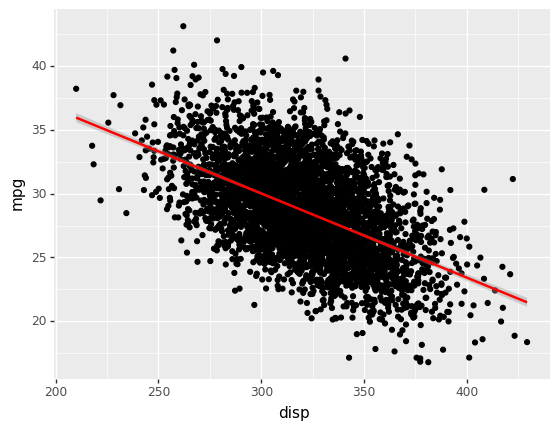

<ggplot: (114823946910)>

In [13]:
# Note: we will review how this code works when we cover Visualization

from plotnine import *
(ggplot(df, aes(x = "disp", y = "mpg")) +
    geom_point() + geom_smooth(method = "lm", color = "red"))

What if you want to use more than 1 independent variable in your model...just add them on as follows:
```
yourmodel = smf.ols("y ~ x1 + x2 + x3 + ...", data = df).fit()
```

Now you try it...build a model to explain `mpg` using both `disp` and `weight`. View the results and discuss them with your neighbor.

In [14]:
results2 = smf.ols("mpg ~ disp + weight", data = df).fit()
print(results2.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.286
Model:                            OLS   Adj. R-squared:                  0.286
Method:                 Least Squares   F-statistic:                     855.0
Date:                Tue, 30 Jan 2024   Prob (F-statistic):          5.48e-313
Time:                        11:19:49   Log-Likelihood:                -10901.
No. Observations:                4270   AIC:                         2.181e+04
Df Residuals:                    4267   BIC:                         2.183e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     49.9461      0.517     96.615      0.0

Here's what we'd say about this model:

* The R-squared of 0.286 suggests that the model only explains 28.6% of the variability in mpg
     - The adjusted R-squared barely increased from 0.285 to 0.286, suggesting that this model is not much better than our first model
* Both disp and weight are statistically significant
     - As disp increases by 1 cubic inch, mpg decreases by 0.03 on average **holding other variables constant**
     - As weight increases by 1 pound, mpg decreases by 0.004 on average **holding other variables constant**
* In terms of practical significance, both estimates are very close to 0 and therefore wouldn't significantly impact the overall mpg of a car

### Using Categorical Variables

Columns with only a discrete set of values are categorical variables.
* Often these are strings
* But can be numeric coding as well; if so, you'll need to tell Python explicitly that these are not numbers but factors (I'll give examples later.)

Other examples...
* Days of the week, months of the year
* Colors (red, green, blue...)
* States, countries
Python mostly knows how to use these in models by creating indicator or dummy variables.

In the code cell below, copy/paste your previous model and add the `trans` variable:

In [15]:
results3 = smf.ols("mpg ~ disp + weight + trans", data = df).fit()
print(results3.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.538
Model:                            OLS   Adj. R-squared:                  0.537
Method:                 Least Squares   F-statistic:                     1653.
Date:                Tue, 30 Jan 2024   Prob (F-statistic):               0.00
Time:                        11:20:27   Log-Likelihood:                -9973.8
No. Observations:                4270   AIC:                         1.996e+04
Df Residuals:                    4266   BIC:                         1.998e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          49.0961      0.416    1

How would you interpret the estimate for `trans[T.manual]`?

* If the car is a manual transmission, it gets 4.25 better mpg versus if the car is automatic transmission, holding other variables constant

## Using Models to Predict

Although inferential models are typically used to explain the relationships between variables, you may want to get predictions from your model. 

The following command will give us an array of predictions for each observation in our data set. (Think of an "array" as a single row of data.)

In [16]:
results3.predict()

array([35.70432423, 27.8794459 , 30.37422508, ..., 33.24651068,
       27.40455863, 26.17795263])

Getting the predictions in an array isn't very helpful, so instead you can add the predictions to your data:

In [17]:
df["pred3"] = results3.predict()
df

,weight,trans,disp,mpg,likes,pred3
0,2629.352834,manual,262.738088,35.142443,550,35.704324
1,3180.711564,auto,314.899095,26.440939,24,27.879446
2,2800.649880,auto,278.271319,28.460785,50,30.374225
3,2654.002500,auto,270.853970,33.874817,155,31.065437
4,3248.800906,auto,328.693431,26.524794,21,27.140209
...,...,...,...,...,...,...
4265,3485.852699,auto,350.012993,30.988562,44,25.645835
4266,3341.001170,auto,337.141002,23.895364,12,26.552697
4267,3000.993054,manual,299.007420,33.775384,352,33.246511
4268,3223.297904,auto,323.836850,27.140179,25,27.404559


## Other Common Model Types

### Logistic Regression
**Logistic regression is used when your dependent variable is binary (e.g., yes/no, failure/success, default/no default).**

Although the models from the `statsmodels` package can handle categorical variables with words as independent variables, the dependent variable always needs to be numeric. We are going to build a model to try to predict the type of transmission a car has. However, the `trans` variable is coded with words. 

Before running our logistic regression, we will need to code the categories as 0's and 1's. Let's convert `trans` to 0 (for "automatic") and 1 (for "manual"):

In [18]:
df["transManual"] = (df["trans"] == "manual").astype(int)
df

,weight,trans,disp,mpg,likes,pred3,transManual
0,2629.352834,manual,262.738088,35.142443,550,35.704324,1
1,3180.711564,auto,314.899095,26.440939,24,27.879446,0
2,2800.649880,auto,278.271319,28.460785,50,30.374225,0
3,2654.002500,auto,270.853970,33.874817,155,31.065437,0
4,3248.800906,auto,328.693431,26.524794,21,27.140209,0
...,...,...,...,...,...,...,...
4265,3485.852699,auto,350.012993,30.988562,44,25.645835,0
4266,3341.001170,auto,337.141002,23.895364,12,26.552697,0
4267,3000.993054,manual,299.007420,33.775384,352,33.246511,1
4268,3223.297904,auto,323.836850,27.140179,25,27.404559,0


*Why do we not need to create another dummy variable for "automatic"?*

Now, let's build a model using `mpg` to predict `trans`...notice that the code is almost exactly the same as for an OLS model, except that we are now using the `logit()` function instead of `ols()`:

In [19]:
logresults = smf.logit("transManual ~ mpg", data = df).fit()
print(logresults.summary())

Optimization terminated successfully.
         Current function value: 0.425078
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:            transManual   No. Observations:                 4270
Model:                          Logit   Df Residuals:                     4268
Method:                           MLE   Df Model:                            1
Date:                Tue, 30 Jan 2024   Pseudo R-squ.:                  0.2484
Time:                        11:20:42   Log-Likelihood:                -1815.1
converged:                       True   LL-Null:                       -2414.8
Covariance Type:            nonrobust   LLR p-value:                8.037e-263
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -13.5500      0.462    -29.315      0.000     -14.456     -12.644
mpg            0.4193      0.

Running a logistic regression is very straightforward once you know how to run an OLS regression. However, the mechanics of how a logistic regression is modeled is *very* different because we are now trying to predict the *probability* of the car being either manual or automatic. 

You can see this when you graph the scatter plot as follows:

<Axes: xlabel='mpg', ylabel='transManual'>

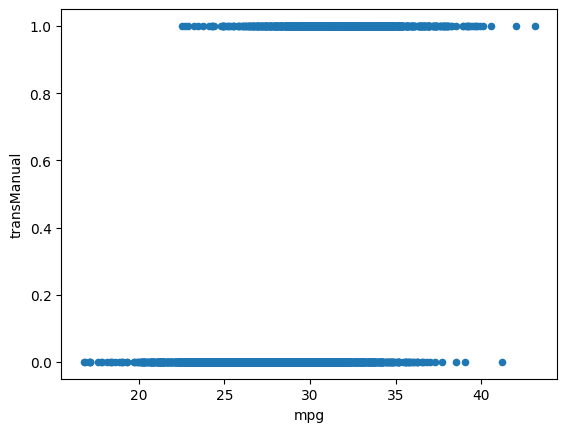

In [20]:
df.plot.scatter(x = "mpg", y = "transManual")

Probabilities can't go above 1 or below 0, so we can't just simply draw a straight line through the data.

Instead, a logistic (S-shaped) curve is used to model the probabilities. What this means for us is that the interpretation of the coefficient for `mpg` is no longer straightforward. For example, the coefficient of 0.42 in the model above suggests that, as mpg increases by 1 unit, the *log-odds* of the car being manual increases by 0.42. 

What does that mean...*log-odds*? It's a number most people don't interpret. Instead, we can estimate the average marginal effect using `get_margeff()`:

In [21]:
print(logresults.get_margeff().summary())

        Logit Marginal Effects       
Dep. Variable:            transManual
Method:                          dydx
At:                           overall
                dy/dx    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
mpg            0.0573      0.001     43.389      0.000       0.055       0.060


The average marginal effect for `mpg` is 0.0573, which means that, **on average, for each additional mile per gallon a car can travel, the probability of the car being manual increases by 5.73%.**

Now you try... use `mpg`, `disp`, and `weight` to predict `trans` and then get the marginal effects:

In [22]:
logresults2 = smf.logit("transManual ~ mpg + disp + weight", data = df).fit()
print(logresults2.get_margeff().summary())

Optimization terminated successfully.
         Current function value: 0.357957
         Iterations 7
        Logit Marginal Effects       
Dep. Variable:            transManual
Method:                          dydx
At:                           overall
                dy/dx    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
mpg            0.0742      0.001     60.452      0.000       0.072       0.077
disp           0.0044      0.002      2.712      0.007       0.001       0.008
weight      5.612e-05      0.000      0.344      0.731      -0.000       0.000


Here's what we'd say about the model:

* weight is not statistically significant, so we would not interpret that coefficient
* mpg and disp are statistically significant
     - as mpg increases by 1 additional mile per gallon, the likelihood the car is manual transmission increases by **on average** 7.42%, holding other variables constant
     - as disp increases by 1 cubic inch, the likelihood the car is manual transmission increases by **on average** 0.44%, holding other variables constant
* In terms of practical significance, again disp is very close to 0. However, a 7.42% increase in the likelihood of the car being manual with mpg does seem like a meaningful effect size

### Poisson Regression

**Poisson regression is used when your dependent variable is a counted variable (e.g., # of tickets sold, # of calls received, count of sales transactions).** The key here is that the variable should be non-negative (i.e., >=0) and an integer. The distribution of a counted variable is also often skewed.

Notice that `likes` is a counted variable...here's the histogram once again:

<Axes: ylabel='Frequency'>

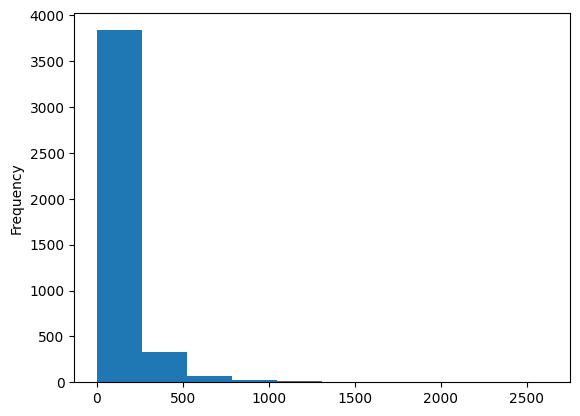

In [23]:
df["likes"].plot.hist()

Let's use `mpg` to explain `likes` and again notice that the structure of the command only differs with the use of the `poisson()` function:

In [24]:
poisresults = smf.poisson("likes ~ mpg", data = df).fit()
print(poisresults.get_margeff().summary())

Optimization terminated successfully.
         Current function value: 12.345662
         Iterations 6
       Poisson Marginal Effects      
Dep. Variable:                  likes
Method:                          dydx
At:                           overall
                dy/dx    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
mpg           29.6186      0.060    490.962      0.000      29.500      29.737


Once again, we need to get the average marginal effects using `get_margeff()` because a poisson regression uses a logistic curve to model the relationship instead of a straight line. But the interpretation of the marginal effect is similar to logistic regression: **for every additional mile per gallon travelled by the car, the number of likes increase, on average, by 29.6 likes**. 

Now you try...use `mpg`, `disp`, and `weight` to explain `likes`:

In [25]:
poisresults2 = smf.poisson("likes ~ mpg + disp + weight", data = df).fit()
print(poisresults2.get_margeff().summary())

Optimization terminated successfully.
         Current function value: 12.202105
         Iterations 10
       Poisson Marginal Effects      
Dep. Variable:                  likes
Method:                          dydx
At:                           overall
                dy/dx    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
mpg           30.3595      0.065    469.138      0.000      30.233      30.486
disp           0.1717      0.051      3.397      0.001       0.073       0.271
weight         0.0036      0.005      0.713      0.476      -0.006       0.014


Here's what we could say about this model:

* Again, weight is not statistically significant, so we would not interpret that number
* mpg and disp are statistically significant
     - as mpg increases by 1, the number of likes the car gets increases by 30.4 likes **on average**, holding other variables constant
     - as disp increases by 1 cubic inch, the number of likes the car gets increases by 0.17 likes **on average**, holding other variables constant
* Once again, there appears to be no practical significance in the relationship between disp and likes. But the relationship between mpg and likes does appear to be somewhat meaningful

## In-class Exercise

Your company currently makes generic widgets sold in the country of Sylvania. The neighboring country Freedonia currently has no sales. The Freedonia government has just allowed sales of widgets in their country but will charge
$250,000 for a license to sell in their country next year.

To simplify: (a) Your capacity is unlimited; (b) 4% of gross sales are proﬁt; (c) you have sales for each person in Sylvania for the last year; and (d) you have census data for both countries. The ﬁle is "dataFreedonia.csv"

Should your company enter the Freedonia market?

In [26]:
df2 = pd.read_csv("dataFreedonia.csv")
df2
df2.dtypes

,Income,Country,Age,Height,Location,Gender,Sales
0,2093,Sylvania,33,67,Rural,Female,251.0
1,32976,Freedonia,30,59,City,Male,NaN
2,4930,Sylvania,18,67,City,Male,683.0
3,2368,Sylvania,24,63,City,Female,697.0
4,80587,Sylvania,21,60,City,Male,903.0
...,...,...,...,...,...,...,...
59010,4209,Sylvania,45,67,Rural,Female,-191.0
59011,174607,Sylvania,20,72,City,Male,842.0
59012,12515,Sylvania,43,68,City,Female,725.0
59013,69246,Sylvania,46,68,City,Male,764.0


Income        int64
Country      object
Age           int64
Height        int64
Location     object
Gender       object
Sales       float64
dtype: object

In [27]:
df2.isna().sum()

Income          0
Country         0
Age             0
Height          0
Location        0
Gender          0
Sales       14751
dtype: int64

In [28]:
df2["Country"].value_counts()
# The missing values are for observations from Freedonia
# where widgets are not currently sold

Sylvania     44264
Freedonia    14751
Name: Country, dtype: int64

In [29]:
df2.describe().round(3)

,Income,Age,Height,Sales
count,59015.000,59015.000,59015.000,44264.000
mean,98579.171,38.929,65.502,599.995
std,184260.421,18.453,3.015,357.524
min,43.000,18.000,52.000,-1303.000
25%,13043.000,25.000,63.000,542.000
50%,35861.000,34.000,65.000,700.000
75%,98847.000,48.000,68.000,808.000
max,1999574.000,119.000,78.000,1326.000


In [30]:
pd.crosstab(df2["Location"], df2["Country"], margins = True, normalize = "columns")
# The distribution of city vs. rural is different
# between Sylvania and Freedonia

Country,Freedonia,Sylvania,All
Location,,,
City,0.194766,0.797601,0.64692
Rural,0.805234,0.202399,0.35308


In [31]:
pd.crosstab(df2["Gender"], df2["Country"], margins = True, normalize = "columns")
# The distribution between Female vs. Male is approximately the same

Country,Freedonia,Sylvania,All
Gender,,,
Female,0.499627,0.502327,0.501652
Male,0.500373,0.497673,0.498348


array([[<Axes: xlabel='Income', ylabel='Income'>,
        <Axes: xlabel='Age', ylabel='Income'>,
        <Axes: xlabel='Height', ylabel='Income'>,
        <Axes: xlabel='Sales', ylabel='Income'>],
       [<Axes: xlabel='Income', ylabel='Age'>,
        <Axes: xlabel='Age', ylabel='Age'>,
        <Axes: xlabel='Height', ylabel='Age'>,
        <Axes: xlabel='Sales', ylabel='Age'>],
       [<Axes: xlabel='Income', ylabel='Height'>,
        <Axes: xlabel='Age', ylabel='Height'>,
        <Axes: xlabel='Height', ylabel='Height'>,
        <Axes: xlabel='Sales', ylabel='Height'>],
       [<Axes: xlabel='Income', ylabel='Sales'>,
        <Axes: xlabel='Age', ylabel='Sales'>,
        <Axes: xlabel='Height', ylabel='Sales'>,
        <Axes: xlabel='Sales', ylabel='Sales'>]], dtype=object)

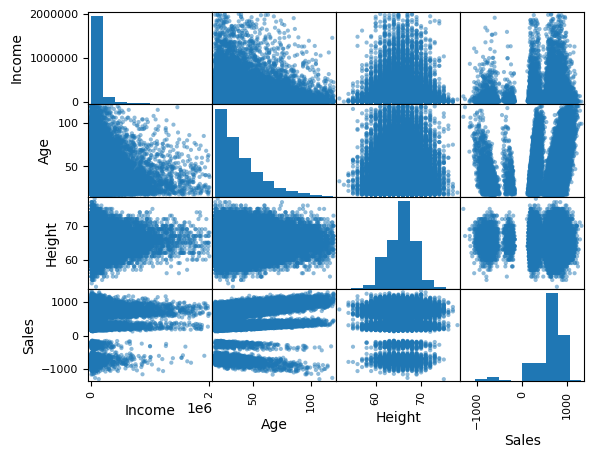

In [32]:
pd.plotting.scatter_matrix(df2)
# Notice the negative values for Sales
# Is this a data quality issue?

In [33]:
# To remove the negative Sales
import numpy as np
df2.loc[df2["Sales"] < 0, "Sales"] = np.NaN

In [34]:
# Let's look at average sales for Sylvanians
df2.query("Country == 'Sylvania'")["Sales"].describe()

count    42220.000000
mean       661.375083
std        223.854997
min        113.000000
25%        591.000000
50%        709.000000
75%        814.000000
max       1326.000000
Name: Sales, dtype: float64

In [35]:
# Without a model, we'd estimate the potential sales
# in Freedonia using the mean:
revenue = 661 * 14751 * 0.04
license = 250000
profit = revenue - license
profit

140016.44

But is this reasonable? The location characteristics were very different between the 2 countries...making assumptions based on Sylvania's sales average is risky. Let's build a model instead (*I've left Country out of the model since it's not a valid predictor of Sales currently*):

In [36]:
mod1 = smf.ols("Sales ~ Income + Gender + Location + Height + Age", data = df2).fit()
print(mod1.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.910
Model:                            OLS   Adj. R-squared:                  0.910
Method:                 Least Squares   F-statistic:                 8.519e+04
Date:                Tue, 30 Jan 2024   Prob (F-statistic):               0.00
Time:                        11:24:13   Log-Likelihood:            -2.3757e+05
No. Observations:               42220   AIC:                         4.751e+05
Df Residuals:                   42214   BIC:                         4.752e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept           565.5425      7.17

In [37]:
df2_Free = df2.loc[df2["Country"] == "Freedonia"].copy()
df2_Free["pred_sales"] = mod1.predict(df2_Free)
df2_Free

# Note: use .copy() when saving a subset of data so that changes made to the 
# new data frame do not change the original data

,Income,Country,Age,Height,Location,Gender,Sales,pred_sales
1,32976,Freedonia,30,59,City,Male,NaN,796.539302
6,37455,Freedonia,45,73,Rural,Male,NaN,360.770095
8,13572,Freedonia,40,57,City,Male,NaN,828.067610
10,2234,Freedonia,53,70,City,Male,NaN,870.281121
12,277315,Freedonia,25,63,City,Male,NaN,781.746220
...,...,...,...,...,...,...,...,...
58999,58550,Freedonia,19,68,Rural,Female,NaN,146.735152
59001,104654,Freedonia,28,66,City,Male,NaN,790.948880
59002,5396,Freedonia,20,65,Rural,Male,NaN,280.708397
59008,84562,Freedonia,21,67,Rural,Male,NaN,284.285067


In [38]:
df2_Free["pred_sales"].sum()

5452244.714987011

In [39]:
pred_revenue = df2_Free["pred_sales"].sum()
pred_profit = pred_revenue * 0.04
license = 250000
profit = pred_profit - license
profit

-31910.21140051956

Conclusion: The licensing fee outweighs the predicted profits, so it's not worth it.